In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [12]:
from sklearn import datasets
dataset=datasets.make_blobs(n_features=1000,centers=3)
dataset

(array([[  5.59360259,   3.8507177 ,  -8.73359053, ...,  -6.59076014,
          -3.25137896,  -4.31978174],
        [  4.75834532,   4.3733807 ,  -8.63895729, ...,  -5.71643303,
          -5.45648973,  -2.26554139],
        [  5.3723712 , -10.80129282,  -5.47716543, ...,   6.23858898,
          -2.33513616,   9.55141219],
        ...,
        [  5.92283049,   2.79858252,  -9.50000015, ...,  -4.43478188,
          -4.82386005,  -2.07776129],
        [ -7.20774438,  -1.71073207,   0.81308468, ...,   6.58646574,
          -1.16601545,  -6.4660746 ],
        [  4.41323906,   3.39164558,  -8.5612298 , ...,  -5.07340023,
          -6.13702873,  -3.58246523]]),
 array([1, 1, 2, 2, 0, 0, 1, 2, 1, 0, 0, 2, 1, 0, 2, 0, 0, 0, 1, 1, 1, 0,
        0, 0, 2, 1, 1, 2, 0, 2, 1, 1, 1, 2, 2, 0, 2, 2, 0, 2, 1, 0, 2, 0,
        0, 1, 0, 1, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 2, 2, 0, 0, 2, 2, 1, 2,
        2, 2, 0, 1, 2, 0, 0, 1, 2, 1, 1, 0, 2, 1, 0, 0, 2, 1, 0, 0, 2, 1,
        2, 0, 2, 2, 2, 1, 2, 2, 0, 1, 0, 

In [13]:
X=dataset[0]
X

array([[  5.59360259,   3.8507177 ,  -8.73359053, ...,  -6.59076014,
         -3.25137896,  -4.31978174],
       [  4.75834532,   4.3733807 ,  -8.63895729, ...,  -5.71643303,
         -5.45648973,  -2.26554139],
       [  5.3723712 , -10.80129282,  -5.47716543, ...,   6.23858898,
         -2.33513616,   9.55141219],
       ...,
       [  5.92283049,   2.79858252,  -9.50000015, ...,  -4.43478188,
         -4.82386005,  -2.07776129],
       [ -7.20774438,  -1.71073207,   0.81308468, ...,   6.58646574,
         -1.16601545,  -6.4660746 ],
       [  4.41323906,   3.39164558,  -8.5612298 , ...,  -5.07340023,
         -6.13702873,  -3.58246523]])

In [14]:
Y=dataset[1]
Y

array([1, 1, 2, 2, 0, 0, 1, 2, 1, 0, 0, 2, 1, 0, 2, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 2, 1, 1, 2, 0, 2, 1, 1, 1, 2, 2, 0, 2, 2, 0, 2, 1, 0, 2, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 2, 2, 0, 0, 2, 2, 1, 2,
       2, 2, 0, 1, 2, 0, 0, 1, 2, 1, 1, 0, 2, 1, 0, 0, 2, 1, 0, 0, 2, 1,
       2, 0, 2, 2, 2, 1, 2, 2, 0, 1, 0, 1])

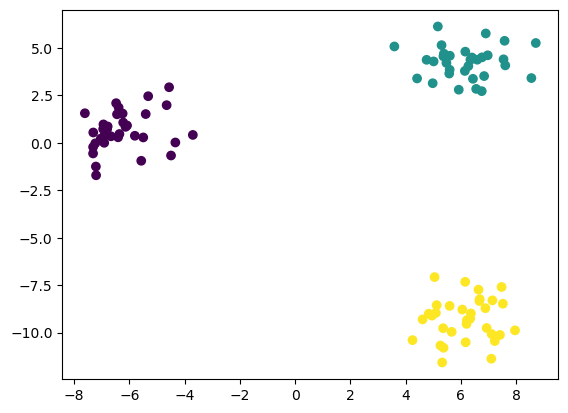

In [15]:
plt.scatter(x=X[:,0],y=X[:,1],c=Y)

In [16]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_train=train_test_split(X,Y,test_size=.3,random_state=42)

In [17]:
# Standard Scaling
from sklearn.preprocessing import  StandardScaler
scalar=StandardScaler()
scalar.fit_transform(X_train)
scalar.transform(X_test)

array([[ 0.55364997,  1.13090641, -1.24067007, ..., -1.85693394,
        -1.26367722, -0.55443171],
       [ 0.77294941, -1.06927038, -0.27713067, ...,  0.47672938,
         0.52444954,  1.06545279],
       [ 0.36658997, -1.44029683, -0.14217174, ...,  0.30475734,
        -0.01699764,  1.15090241],
       ...,
       [-1.41943738,  0.60572889,  1.24527066, ...,  0.90244334,
         2.01553269, -1.00322657],
       [-1.38207205,  0.53141445,  1.06819212, ...,  0.81456838,
         1.92010384, -1.04094725],
       [-1.42472248,  0.70671268,  1.56869928, ...,  0.54054606,
         0.66481504, -1.11205608]])

In [18]:
from sklearn.cluster import KMeans

wscc_values=[]
for k in range(1,11):
	kmeans=KMeans(init="k-means++",n_clusters=k)
	kmeans.fit_transform(X_train)
	wscc_values.append(kmeans.inertia_)

wscc_values

[1568709.7783486599,
 757693.1555890426,
 67062.43075398228,
 66004.46490788396,
 64862.47926350836,
 63870.40299954259,
 62813.764030265906,
 61634.60067021854,
 60594.39730262047,
 59493.465753157114]

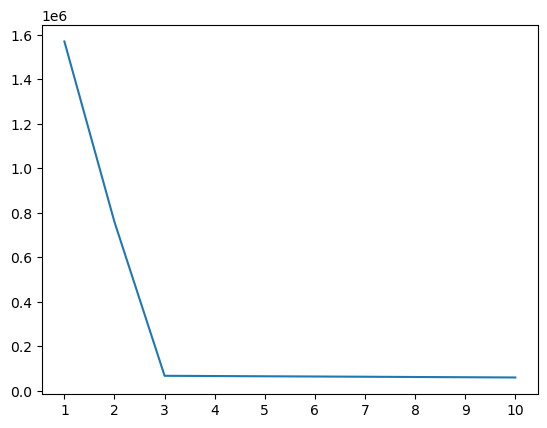

In [ ]:
## plot elbow curve
plt.plot(list(range(1,11)),wscc_values)
plt.xticks(list(range(1,11)))

plt.show()

In [29]:
# here K=3
kmeans=KMeans(n_clusters=3,init='k-means++')
kmeans.fit_predict(X_train)

array([0, 1, 2, 2, 1, 2, 0, 0, 2, 2, 1, 0, 0, 0, 0, 1, 2, 1, 0, 2, 0, 0,
       2, 2, 1, 0, 1, 1, 0, 2, 1, 1, 1, 2, 1, 0, 2, 2, 2, 1, 1, 2, 0, 2,
       2, 2, 1, 1, 0, 0, 0, 2, 0, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 0, 1, 2,
       2, 0, 0, 1])

In [31]:
Y_pred=kmeans.predict(X_test)
Y_pred

array([1, 0, 0, 1, 2, 0, 2, 2, 2, 1, 1, 1, 1, 0, 0, 2, 1, 2, 1, 1, 1, 0,
       1, 0, 1, 2, 1, 2, 2, 2])

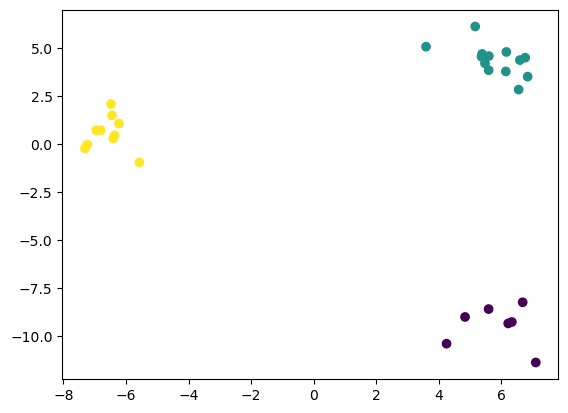

In [32]:
plt.scatter(x=X_test[:,0],y=X_test[:,1],c=Y_pred)